<a href="https://colab.research.google.com/github/ricardopeloi/bootcamp-alura-data-science/blob/main/Ricardo_Ferrari_Peloi_Bootcamp_Data_Science_Alura_Projeto_M%C3%B3dulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do Mega Desafio

Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



# Resumo:

Abaixo um resumo dos objetivos da análise e das conclusões a que cheguei, utilizando a base de dados de **Casos de COVID 19 do Brasil.IO**.

É uma análise simples, mas que usa diversos conceitos de manipulação de data frames com **Pandas** e visualização de gráficos básicos com **Matplotlib**.

## Objetivo
A análise realizada teve como objetivo comparar os níveis de infecção através de 2 indicadores:
* Número absoluto de casos, por estado
* Número relativo (por 100 mil habitantes) de casos, por estado.

## Conclusões
Pela análise realizada, podemos identificar as seguintes conclusões sobre os 6 estados mais críticos da pandemia:
*   Os estados com maiores números de casos absolutos tendem a coincidir com os estados de maiores populações. **Os quatro estados mais populosos do Brasil são São Paulo, Minas Gerais, Rio de Janeiro e Bahia, que correspondem a cerca de 47% da população do Brasil. Estes também são aqueles onde foram registrados mais casos de COVID, com 38% da contagem total de casos**. Ou seja, por si só, a gravidade da pandemia em um local poderá ser avaliada de acordo com a população total daquele lugar;
*   Porém, como vemos pela divergência entre população e número de casos, é importante observar que os estados onde tivemos maiores taxas de casos por 100 mil habitantes são estados pouco populosos, como **Amapá, Distrito Federal e Roraima**. Amapá e DF, inclusive, chegaram a superar as 100 infecções diárias por 100 mil habitantes por alguns dias no mês de junho, o pico da pandemia. **Nestes três estados, bem pouco populosos, ou seja que abrigam apenas 2% da população, foram contabilizados quase 6% dos casos do nosso país**.


# Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

BD = pd.read_csv("/content/drive/MyDrive/Estudo/Data Science/Bootcamps Alura/Módulo 1/caso.csv")

#https://github.com/turicas/covid19-br/blob/master/api.md#casos

BD["date"] = pd.to_datetime(BD["date"], format="%Y-%m-%d")

#BD.groupby("city").count().loc["NaN"]
#BD[(BD["state"]=="AP") & (pd.isnull(BD["city"]))].head()
#BD.groupby("state").sum()
BD.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-21,AP,NaN,state,56236,789,243,True,845731.0,861773.0,16.0,6525.61637,0.0140
1,2020-11-20,AP,NaN,state,56085,787,242,False,845731.0,861773.0,16.0,6508.09436,0.0140
2,2020-11-19,AP,NaN,state,55885,785,241,False,845731.0,861773.0,16.0,6484.88639,0.0140
3,2020-11-18,AP,NaN,state,55652,783,240,False,845731.0,861773.0,16.0,6457.84911,0.0141
4,2020-11-17,AP,NaN,state,55382,782,239,False,845731.0,861773.0,16.0,6426.51835,0.0141


In [ ]:
BD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020404 entries, 0 to 1020403
Data columns (total 13 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   date                            1020404 non-null  datetime64[ns]
 1   state                           1020404 non-null  object        
 2   city                            1013645 non-null  object        
 3   place_type                      1020404 non-null  object        
 4   confirmed                       1020404 non-null  int64         
 5   deaths                          1020404 non-null  int64         
 6   order_for_place                 1020404 non-null  int64         
 7   is_last                         1020404 non-null  bool          
 8   estimated_population_2019       1016475 non-null  float64       
 9   estimated_population            1016475 non-null  float64       
 10  city_ibge_code                  1016475 no

In [ ]:
BD_por_estado_ultimo = BD[(BD["is_last"] == True) & (BD["place_type"]=="state")]
BD_por_estado_ultimo = BD_por_estado_ultimo[["state", "confirmed", "estimated_population"]].set_index("state").sort_values(by="confirmed", ascending=False)
BD_por_estado_ultimo["Casos por 100 mil"] = BD_por_estado_ultimo["confirmed"]/(BD_por_estado_ultimo["estimated_population"]/100000)
BD_por_estado_ultimo = BD_por_estado_ultimo.drop("estimated_population", axis = 1)
BD_por_estado_ultimo = BD_por_estado_ultimo.rename(columns={"confirmed": "Casos totais"})

BD_por_estado_ultimo

,Casos totais,Casos por 100 mil
state,,
SP,1205435,2604.131280
MG,395534,1857.606746
BA,383945,2571.525094
RJ,337277,1942.147468
SC,323390,4459.012903
RS,296904,2599.183242
CE,291312,3170.879874
GO,273234,3841.041169
PA,266008,3060.819297


In [ ]:
"{:.2f}".format(BD_por_estado_ultimo["Casos por 100 mil"].loc["SP"])
#BD_por_estado_ultimo["Casos por 100 mil"].loc["SP"]

'2604.13'

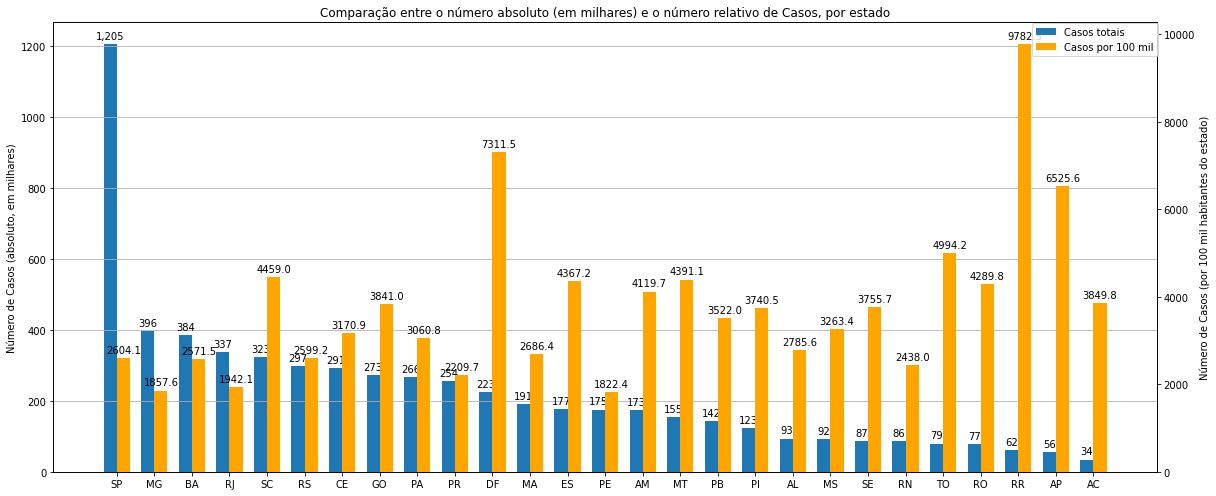

In [ ]:
#https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
#https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
#https://pyformat.info/#number
#https://riptutorial.com/matplotlib/example/10473/single-legend-shared-across-multiple-subplots

labels = BD_por_estado_ultimo.index
Casos = BD_por_estado_ultimo["Casos totais"]/1000
Casos_por_100_mil = BD_por_estado_ultimo["Casos por 100 mil"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(17,7))
ax2 = ax1.twinx()
rects1 = ax1.bar(x - width/2, Casos, width, label='Casos totais')
rects2 = ax2.bar(x + width/2, Casos_por_100_mil, width, label='Casos por 100 mil', color="orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Número de Casos (absoluto, em milhares)')
ax2.set_ylabel("Número de Casos (por 100 mil habitantes do estado)")
ax1.set_title('Comparação entre o número absoluto (em milhares) e o número relativo de Casos, por estado')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.grid(True, axis="y")

#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.legend
#https://matplotlib.org/3.1.1/api/transformations.html#matplotlib.transforms.BboxBase
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
fig.legend(loc="upper right", bbox_to_anchor=(0.95,0.948))

def autolabel(ax, rects, formato):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(formato.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(ax1, rects1, "{:,.0f}")
autolabel(ax2, rects2, "{:.1f}")

fig.tight_layout()

plt.show()

In [ ]:
print("Os quatro estados mais populosos do Brasil correspondem a "
+"{:.2%}".format((BD_por_estado_ultimo.loc[["SP", "MG", "BA", "RJ"]].sum()/BD_por_estado_ultimo.sum())["Casos totais"])
+" dos casos de COVID 19 no Brasil")

print("Já o Amapá, Distrito Federal e Roraima tiveram "
+"{:.2%}".format((BD_por_estado_ultimo.loc[["DF", "AP", "RR"]].sum()/BD_por_estado_ultimo.sum())["Casos totais"])
+" dos casos de COVID 19 no Brasil")

Os quatro estados mais populosos do Brasil correspondem a 38.35% dos casos de COVID 19 no Brasil
Já o Amapá, Distrito Federal e Roraima tiveram 5.64% dos casos de COVID 19 no Brasil


Vemos pelo gráfico (barras azuis) acima que o estado de São Paulo apresenta uma quantidade de Casos muito maior do que o restante dos estados brasileiros (cerca de 41,3 mil), enquanto o segundo estado com mais Casos é o Rio de Janeiro (22,6 mil Casos).

Porém, ao mesmo tempo, São Paulo não desponta no top 5 das Casos relativas à população (barras laranjas).

**Vamos então escolher o top 3 dos estados com maiores números de Casos e combinar com o top 3 dos estados com maiores números de Casos relativas à população.**

In [ ]:
estados_com_mais_Casos = pd.DataFrame(BD_por_estado_ultimo.head(3).index.to_list()).set_index(0)
#estados_com_mais_Casos

estados_com_mais_Casos_relativas = pd.DataFrame(BD_por_estado_ultimo.sort_values("Casos por 100 mil", ascending=False).head(3).index.to_list()).set_index(0)
#estados_com_mais_Casos_relativas

estados = estados_com_mais_Casos.join(estados_com_mais_Casos_relativas, how="outer").reset_index()[0].to_list()
estados

BD_estados_selecionados = BD[(BD["place_type"] == "state")].set_index("state").loc[estados][["confirmed", "date", "estimated_population"]].reset_index()
#BD_estados_selecionados["Casos por 100 mil"] = BD_estados_selecionados["confirmed"]/(BD_estados_selecionados["estimated_population"]/100000)
BD_estados_selecionados["Casos confirmados"] = BD_estados_selecionados["confirmed"]
BD_estados_selecionados = BD_estados_selecionados.drop(["estimated_population", "confirmed"], axis = 1)
BD_estados_selecionados = BD_estados_selecionados.pivot(
    index="date",
    columns="state",
    values="Casos confirmados")

#https://stackoverflow.com/questions/39479919/how-do-i-subtract-the-previous-row-from-the-current-row-in-a-pandas-dataframe-an
BD_estados_selecionados = BD_estados_selecionados.diff()
#BD_estados_selecionados.sum()
BD_estados_selecionados

#BD_estados_selecionados.plot(figsize=(16,7))

state,AP,BA,DF,MG,RR,SP
date,,,,,,
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN,0.0
2020-02-27,NaN,NaN,NaN,NaN,NaN,0.0
2020-02-28,NaN,NaN,NaN,NaN,NaN,1.0
2020-02-29,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
2020-11-17,226.0,653.0,628.0,1954.0,455.0,8698.0
2020-11-18,270.0,2071.0,495.0,2324.0,NaN,6421.0
2020-11-19,233.0,2849.0,756.0,2586.0,NaN,6794.0


In [ ]:
# testando se a soma após o diff permanece próxima ao valor total
temp = BD[(BD["is_last"] == True) & (BD["place_type"] == "state")].set_index("state").loc[estados]["confirmed"]

BD_estados_selecionadosSoma = pd.DataFrame(BD_estados_selecionados.sum())
#BD_estados_selecionados
temp = pd.DataFrame(temp)

temp = temp.join(BD_estados_selecionadosSoma[0], how = "outer").rename(columns={0: "Soma pós diff"})
temp["Erro percentual"] = 1-temp["Soma pós diff"]/temp["confirmed"]

temp

,confirmed,Soma pós diff,Erro percentual
state,,,
AP,56236,56057.0,0.003183
BA,383945,383942.0,0.000008
DF,223378,223362.0,0.000072
MG,395534,394511.0,0.002586
RR,61744,60731.0,0.016406
SP,1205435,1183813.0,0.017937


In [ ]:
populacoes = pd.DataFrame(BD[(BD["is_last"]==True) & (BD["place_type"] == "state")].set_index("state")["estimated_population"])
populacoes.sort_values("estimated_population", ascending=False)

,estimated_population
state,
SP,46289333.0
MG,21292666.0
RJ,17366189.0
BA,14930634.0
PR,11516840.0
RS,11422973.0
PE,9616621.0
CE,9187103.0
PA,8690745.0


In [ ]:
print("Os quatro estados mais populosos do Brasil correspondem a "
+"{:.2%}".format((populacoes.loc[["SP", "MG", "BA", "RJ"]].sum()/populacoes.sum())["estimated_population"])
+" da população do Brasil")

print("Já o Amapá, Distrito Federal e Roraima contém "
+"{:.2%}".format((populacoes.loc[["DF", "AP", "RR"]].sum()/populacoes.sum())["estimated_population"])
+" da população do Brasil")

Os quatro estados mais populosos do Brasil correspondem a 47.17% da população do Brasil
Já o Amapá, Distrito Federal e Roraima contém 2.15% da população do Brasil


In [ ]:
#BD_estados_selecionados.plot(figsize=(16,7))
#BD_estados_selecionados

BD_estados_selecionados_100mil = pd.DataFrame()
BD_estados_selecionados_100mil = BD_estados_selecionados.copy()

#https://stackoverflow.com/questions/41402861/trying-to-divide-a-dataframe-column-by-a-float-yields-nan
#https://thispointer.com/pandas-loop-or-iterate-over-all-or-certain-columns-of-a-dataframe/
for (colunaNome, coluna) in BD_estados_selecionados_100mil.iteritems():
   BD_estados_selecionados_100mil["População " + colunaNome] = populacoes.loc[colunaNome].min()
   BD_estados_selecionados_100mil[colunaNome + " por 100 mil"] = coluna/(BD_estados_selecionados_100mil["População "+ colunaNome]/100000)


BD_estados_selecionados_100mil


state,AP,BA,DF,MG,RR,SP,População AP,AP por 100 mil,População BA,BA por 100 mil,População DF,DF por 100 mil,População MG,MG por 100 mil,População RR,RR por 100 mil,População SP,SP por 100 mil
date,,,,,,,,,,,,,,,,,,
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,861773.0,NaN,14930634.0,NaN,3055149.0,NaN,21292666.0,NaN,631181.0,NaN,46289333.0,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN,0.0,861773.0,NaN,14930634.0,NaN,3055149.0,NaN,21292666.0,NaN,631181.0,NaN,46289333.0,0.000000
2020-02-27,NaN,NaN,NaN,NaN,NaN,0.0,861773.0,NaN,14930634.0,NaN,3055149.0,NaN,21292666.0,NaN,631181.0,NaN,46289333.0,0.000000
2020-02-28,NaN,NaN,NaN,NaN,NaN,1.0,861773.0,NaN,14930634.0,NaN,3055149.0,NaN,21292666.0,NaN,631181.0,NaN,46289333.0,0.002160
2020-02-29,NaN,NaN,NaN,NaN,NaN,0.0,861773.0,NaN,14930634.0,NaN,3055149.0,NaN,21292666.0,NaN,631181.0,NaN,46289333.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-17,226.0,653.0,628.0,1954.0,455.0,8698.0,861773.0,26.225004,14930634.0,4.373558,3055149.0,20.555462,21292666.0,9.176869,631181.0,72.087088,46289333.0,18.790506
2020-11-18,270.0,2071.0,495.0,2324.0,NaN,6421.0,861773.0,31.330756,14930634.0,13.870811,3055149.0,16.202156,21292666.0,10.914556,631181.0,NaN,46289333.0,13.871446
2020-11-19,233.0,2849.0,756.0,2586.0,NaN,6794.0,861773.0,27.037282,14930634.0,19.081574,3055149.0,24.745111,21292666.0,12.145027,631181.0,NaN,46289333.0,14.677248


In [ ]:
#https://stackoverflow.com/questions/21285380/find-column-whose-name-contains-a-specific-string
colunasPorMil = [col for col in BD_estados_selecionados_100mil.columns if 'por 100 mil' in col]
#colunasPorMil

BD_estados_selecionados_100milGrafico = BD_estados_selecionados_100mil[colunasPorMil].fillna(0).rolling(window=7).mean()
BD_estados_selecionados_100milGrafico = BD_estados_selecionados_100milGrafico.fillna(0)
BD_estados_selecionados_100milGrafico

state,AP por 100 mil,BA por 100 mil,DF por 100 mil,MG por 100 mil,RR por 100 mil,SP por 100 mil
date,,,,,,
2020-02-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2020-11-17,29.971433,9.025547,17.118641,8.685083,37.548659,9.451113
2020-11-18,30.866597,9.353732,17.455310,8.789076,29.400668,10.376966
2020-11-19,30.319552,10.558350,17.782626,9.258721,24.647673,10.689905


Text(0.5, 1.0, "Média móvel semanal do número de casos nos 6 estados 'mais graves'")

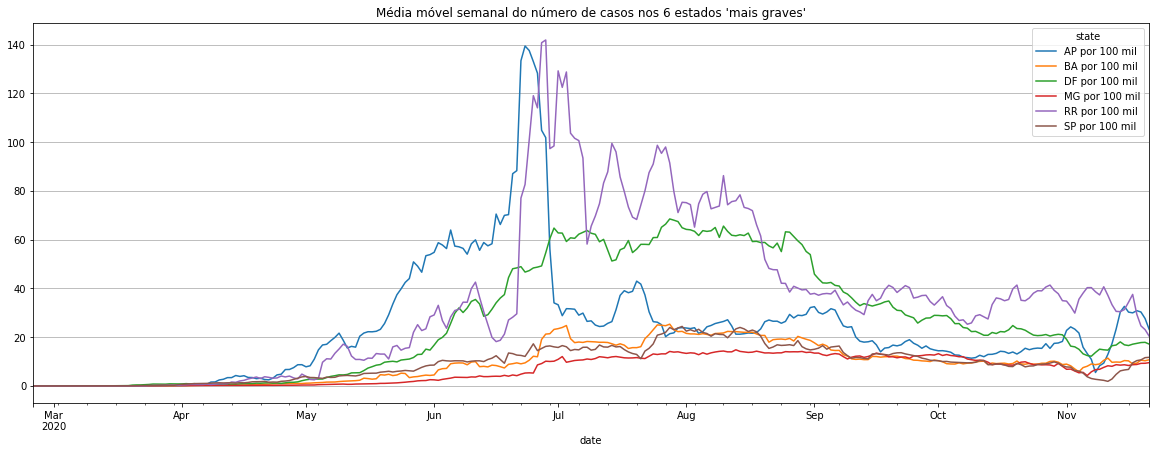

In [ ]:
BD_estados_selecionados_100milGrafico.plot(figsize=(20,7))
plt.grid(True, axis="y")
plt.title("Média móvel semanal do número de casos nos 6 estados 'mais graves'")